In [1]:
import os
os.environ['XLA_FLAGS'] = '--xla_gpu_cuda_data_dir=/home/min/miniconda3/envs/ai-study/lib/'

In [2]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
import tensorflow as tf

print("Keras:", keras.__version__)
print("TensorFlow:", tf.__version__)
print("Backend:", keras.config.backend())

2025-11-20 10:27:28.858032: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-20 10:27:28.873155: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763602048.892279   31036 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763602048.897814   31036 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-20 10:27:28.916539: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Keras: 3.8.0
TensorFlow: 2.18.0
Backend: tensorflow


In [3]:
# 패션 MNIST 데이터셋을 적재하고 훈련 세트와 검증 세트로 나눔
import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 225.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [4]:
# 모델 생성 함수 정의
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28,28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer: # model_fn() 함수에 a_layer 매개변수로 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층 추가
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [5]:
# 모델 생성 및 모델 구조 출력
model = model_fn()
model.summary()

I0000 00:00:1763602058.086175   31036 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1756 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 4GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 모델 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

I0000 00:00:1763602065.511509   31233 service.cc:148] XLA service 0x744374018bf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763602065.511570   31233 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 4GB Laptop GPU, Compute Capability 8.6
2025-11-20 10:27:45.527064: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1763602065.565030   31233 cuda_dnn.cc:529] Loaded cuDNN version 91002
I0000 00:00:1763602066.536806   31233 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


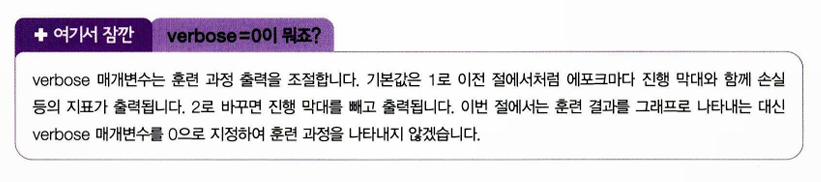

In [7]:
# history 객체에는 훈련 측정값이 담겨 있는 history 딕셔너리가 들어있음
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


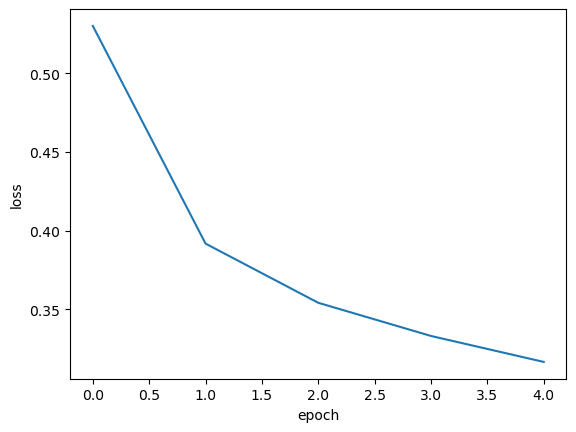

In [8]:
# 에포크에 따른 손실값 
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss') 
plt.show()

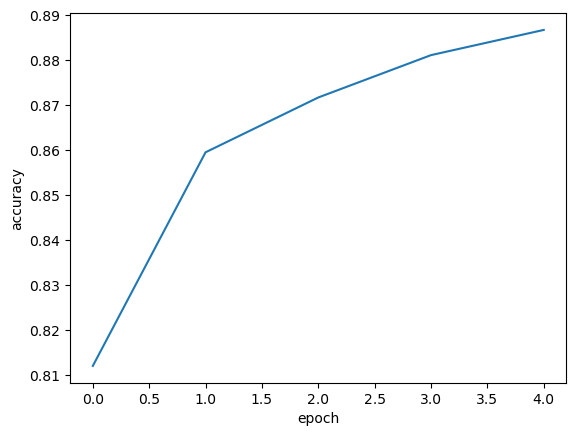

In [9]:
# 에포크에 따른 정확도 
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy') 
plt.show()

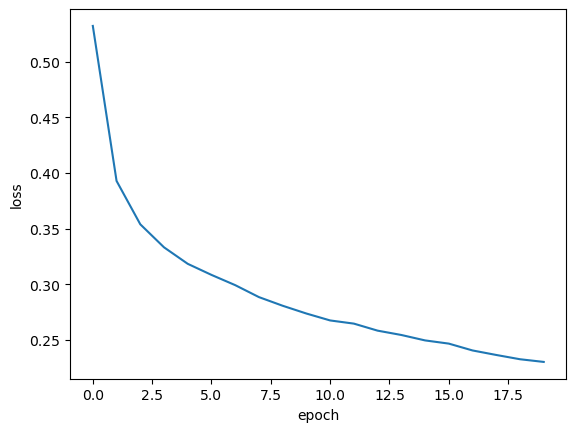

In [10]:
# 에포크 횟수를 20으로 늘려서 모델을 훈련하고 손실 그래프 그리기
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss') 
plt.show()

에포크에 따른 과대적합과 과소적합을 파악하려면 훈련 세트에 대한 점수뿐만 아니라 검증 세트에 대한 점수도 필요

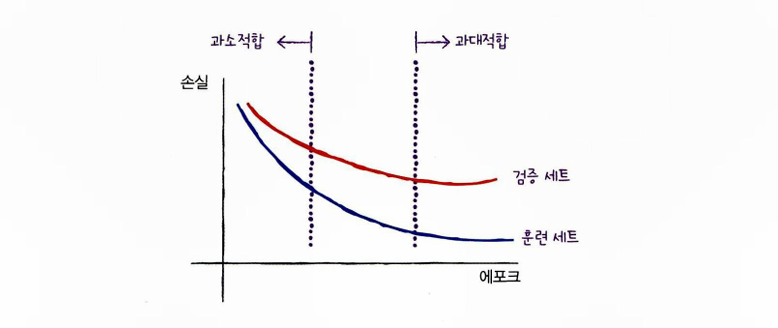
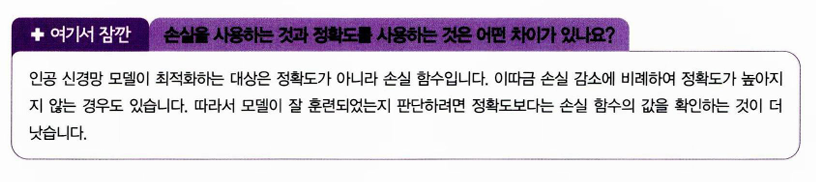

In [11]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 에포크마다 검증 손실을 계산하기 위해 케라스 모델의 fit() 메서드에 검증 데이터를 전달
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [12]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


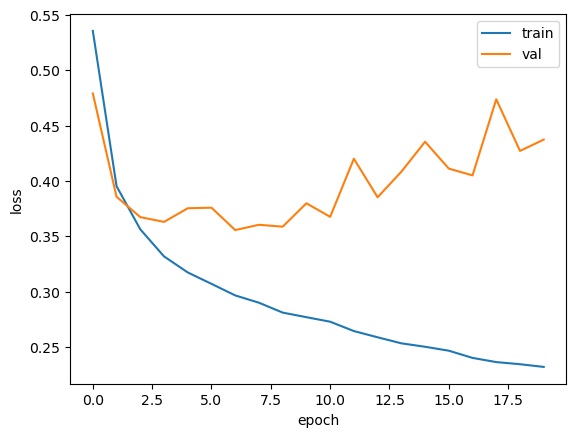

In [13]:
# 과대/과소적합 문제를 조사하기 위해 훈련 손실과 검증 손실을 한 그래프에 그려서 비교
plt.plot(history.history['loss'], label='train') # 훈련 손실
plt.plot(history.history['val_loss'], label='val') # 검증 손실
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

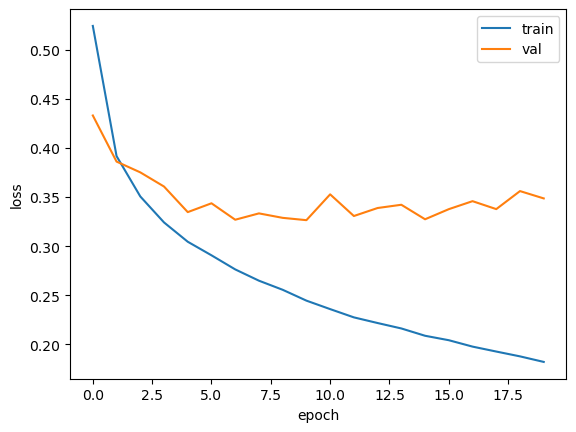

In [15]:
# 옵티마이저 하이퍼파라미터를 조정하여 과대적합을 완화
# Adam은 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기 조정 가능
# Adam 옵티마이저를 적용해 보고 훈련 손실과 검증 손실을 다시 그리기
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train') # 훈련 손실
plt.plot(history.history['val_loss'], label='val') # 검증 손실
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#### 드롭아웃
* 신경망에서 사용하는 대표적인 규제 방법
* 은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기법
* 일부 뉴런에 의존하는 것을 막고 마치 많은 신경망을 앙상블 하는 효과를 냄
* 훈련 중에 적용되며 평가나 예측에서는 적용 x

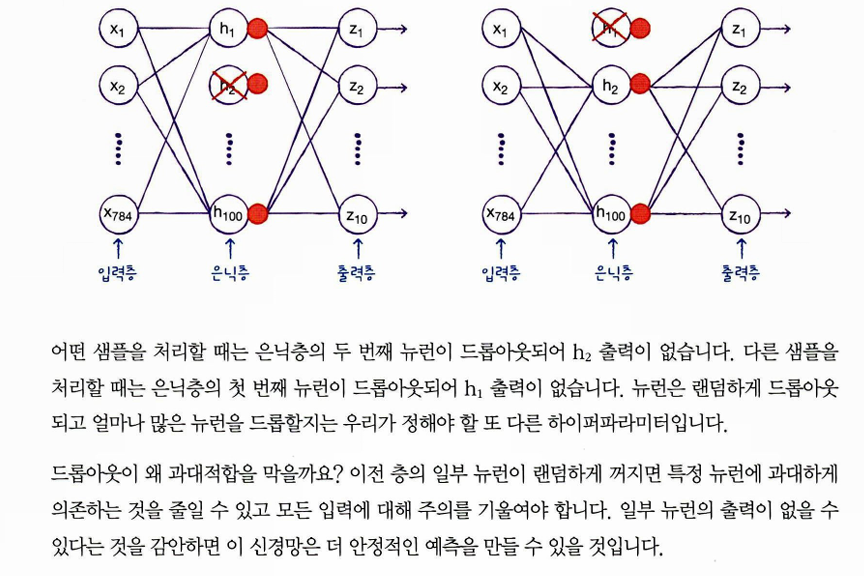

In [16]:
# 앞서 정의한 model_fn() 함수에 드롭아웃 객체를 전달하여 층을 추가
# 케라스는 모델을 평가와 예측에 사용할 때는 자동으로 드롭아웃 적용 X
model = model_fn(keras.layers.Dropout(0.3))
model.summary()
# 은닉층 뒤에 추가된 드롭아웃 층(Dropout)은 훈련되는 모델 파라미터가 없고 입력과 출력의 크기가 같음

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

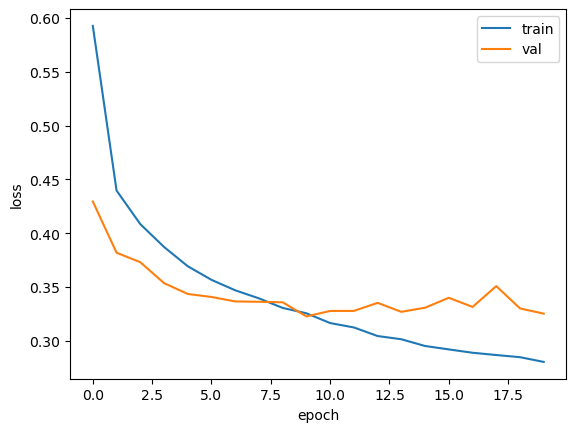

In [18]:
# 훈련 손실과 검증 손실의 그래프를 그려 비교
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train') # 훈련 손실
plt.plot(history.history['val_loss'], label='val') # 검증 손실
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#### 모델 저장과 복원

In [20]:
# 에포크 횟수를 11로 다시 지정하고 모델을 훈련
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=11, verbose=0, validation_data=(val_scaled, val_target))

In [21]:
# 모델 구조와 파라미터를 함께 저장
model.save('model-whole.keras')

# 훈련된 모델의 파라미터만 저장
# save_weights() : 파라미터를 HDF5 포맷으로 저장하며 파일의 확장자는 weights.h5로 끝나야 함
model.save_weights('model.weights.h5')

In [22]:
# 파일이 잘 만들어졌는지 확인
!ls -al model*

-rw-r--r-- 1 min min 979390 Nov 20 11:00 model-whole.keras
-rw-r--r-- 1 min min 976600 Nov 20 11:00 model.weights.h5


복원 방법 1) 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용

In [24]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5') #  load_weights() 메서드를 사용하려면 save_weights() 메서드로 저장했던 모델과 정확히 같은 구조를 가져야 함

In [25]:
# 모델의 검증 정확도 확인
# 10개 확률 중에 가장 큰 값의 인덱스를 골라 타깃 레이블과 비교하여 정확도 계산
# argmax() : 배열에서 가장 큰 값의 인덱스를 반환
import numpy as np
val_labels  = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.8815833333333334


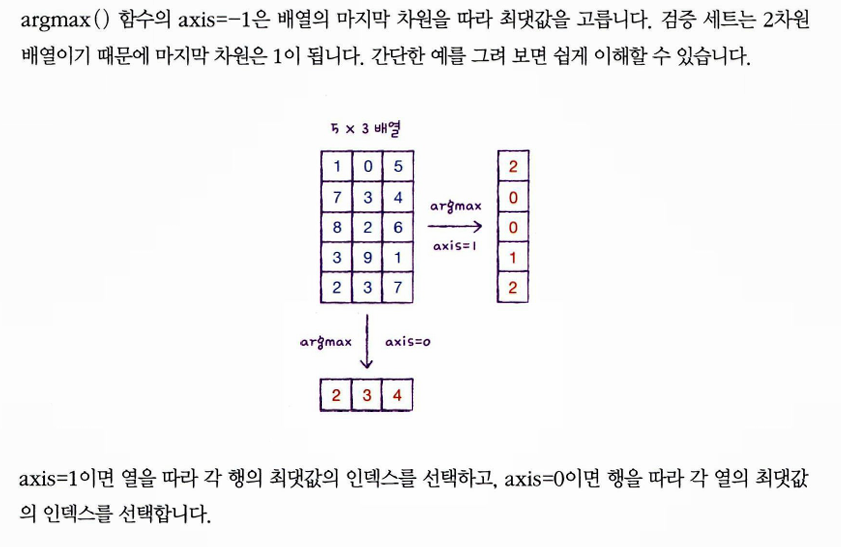

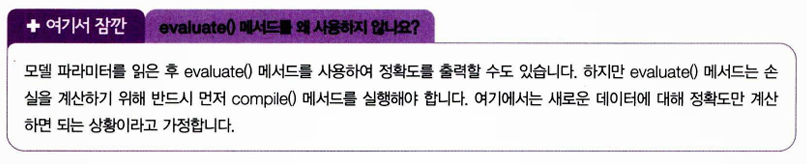

복원 방법 2) model-whole.keras 파일에서 새로운 모델을 만들어 바로 사용

In [26]:
model = keras.models.load_model('model-whole.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8806 - loss: 0.3318


[0.3333876132965088, 0.8815833330154419]

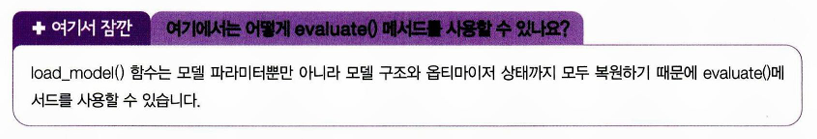

#### 콜백
* 케라스 모델을 훈련하는 도중에 어떤 작업을 수행할 수 있도록 도와주는 도구
* 최상의 모델을 자동으로 저장해 주거나 검증 점수가 더 이상 향상되지 않으면 일찍 종료 가능

In [27]:
# Modelcheckpoint 콜백 : 가장 낮은 검증 손실 모델을 자동으로 저장
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# save_best_only=True 매개변수를 지정하여 가장 낮은 검증 손실을 만드는 모델 저장 가능
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [28]:
model = keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8841 - loss: 0.3229


[0.3230794370174408, 0.8815833330154419]

In [29]:
# 조기 종료 : 검증 점수가 더 이상 감소하지 않고 상승하여 과대적합이 일어나면 훈련을 계속 진행하지 않고 멈추는 기법, EarlyStopping 콜백
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# save_best_only=True 매개변수를 지정하여 가장 낮은 검증 손실을 만드는 모델 저장 가능
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
# patience=2로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련 중지
# restore_best_weights 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [30]:
print(early_stopping_cb.stopped_epoch)

12


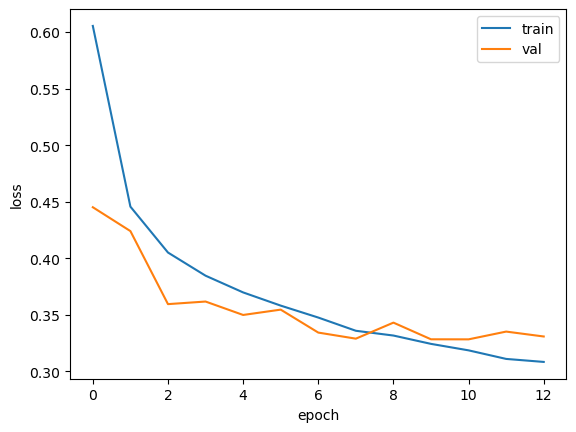

In [31]:
plt.plot(history.history['loss'], label='train') # 훈련 손실
plt.plot(history.history['val_loss'], label='val') # 검증 손실
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [32]:
# 검증 세트에 대한 성능 확인
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8838 - loss: 0.3256


[0.3283424377441406, 0.8800833225250244]